# Import libraries

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np

## Check GPU


In [17]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
# x = x - mean / std -> (x-0) / (1/255) -> convert (0,1) to (0, 255)
transform = torchvision.transforms.Compose([transforms.ToTensor(), 
                                            transforms.Normalize((0,), (1.0/255.0,))])
trainset = torchvision.datasets.FashionMNIST(root='data', 
                                             train=True,
                                             download=True,
                                             transform=transform)
train_loader = torch.utils.data.DataLoader(trainset,
                                           batch_size = 1024,
                                           num_workers=5,
                                           shuffle = True)
testset = torchvision.datasets.FashionMNIST(root='data', 
                                            train=False,
                                            download=True,
                                            transform=transform)
test_loader = torch.utils.data.DataLoader(testset,
                                          batch_size=1024,
                                          num_workers=5,
                                          shuffle=False)

In [19]:
import matplotlib.pyplot as plt
import numpy as np


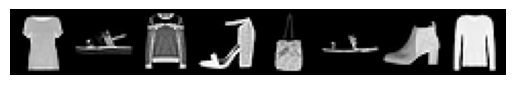

In [20]:
def imshow(img):
    img = img / 255.0
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0)), cmap='gray')
    plt.axis('off')
    plt.show()

for i, (images, labels) in enumerate(train_loader, 0):
    # plot some images 
    imshow(torchvision.utils.make_grid(images[:8]))
    break

# Model


In [21]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(in_features=784, out_features=10)
)
# model = model.to(device)
print(model)



Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [22]:
# input_tensor = torch.rand(5, 1, 28, 28).to(device)
# print(input_tensor.shape)

input_tensor = torch.rand(5, 1, 28, 28)
print(input_tensor.shape)

torch.Size([5, 1, 28, 28])


In [23]:
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


# loss, optimizer and evaluation function

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), 
                      lr = 0.01)


In [25]:
def evaluate(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            # images, labels = images.to(device, labels.to(device))
            images, labels = images, labels
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss+= loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct/total
    # print(accuracy)
    test_loss = test_loss / len(test_loader)
    # print(test_loss)
    return test_loss, accuracy

In [26]:
test_loss, test_accuracy = evaluate(model, test_loader, criterion)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

test_loss: 113.78066864013672
test_accuracy: 1.77


# Train


In [27]:
# parameters
train_losses = []
train_accuracies =[]
test_losses = []
test_accuracies = []
epoch_max = 10


In [28]:
# train
for epoch in range(epoch_max):
    running_loss = 0.0
    running_correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(train_loader, 0):
        # inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # print(f'loss: {loss.item()}')
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()

    epoch_accuracy = 100* running_correct / total
    epoch_loss = running_loss / (i+1)
    test_loss, test_accuracy = evaluate(model, test_loader, criterion)
    print(f"Epoch [{epoch + 1}/{epoch_max}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 3833.5412, Accuracy: 56.31%, Test Loss: 1727.8623, Test Accuracy: 72.23%
Epoch [2/10], Loss: 1691.9451, Accuracy: 71.14%, Test Loss: 1693.6997, Test Accuracy: 67.48%
Epoch [3/10], Loss: 1565.4414, Accuracy: 72.42%, Test Loss: 1994.5959, Test Accuracy: 66.49%
Epoch [4/10], Loss: 1326.2608, Accuracy: 74.26%, Test Loss: 987.2102, Test Accuracy: 72.94%
Epoch [5/10], Loss: 1205.7405, Accuracy: 74.64%, Test Loss: 1458.6419, Test Accuracy: 72.43%
Epoch [6/10], Loss: 1160.0966, Accuracy: 75.22%, Test Loss: 1281.5400, Test Accuracy: 65.37%
Epoch [7/10], Loss: 1214.9339, Accuracy: 76.05%, Test Loss: 584.9616, Test Accuracy: 79.47%
Epoch [8/10], Loss: 1096.4771, Accuracy: 76.84%, Test Loss: 1573.7163, Test Accuracy: 68.37%
Epoch [9/10], Loss: 1077.5071, Accuracy: 76.56%, Test Loss: 1311.1572, Test Accuracy: 79.08%
Epoch [10/10], Loss: 1042.0310, Accuracy: 76.98%, Test Loss: 973.2863, Test Accuracy: 74.85%


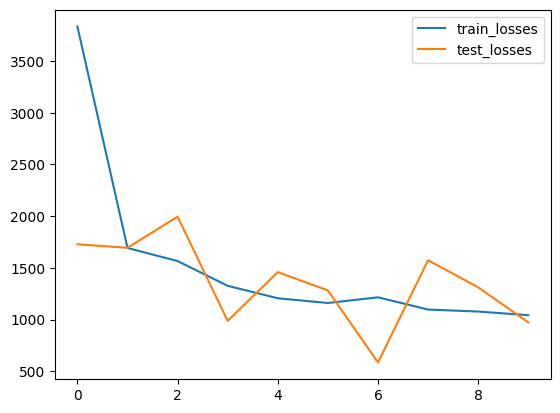

In [29]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

![](2025-08-20-23-52-27.png)

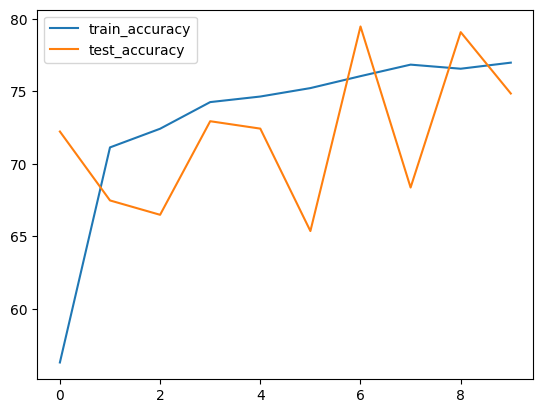

In [30]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()

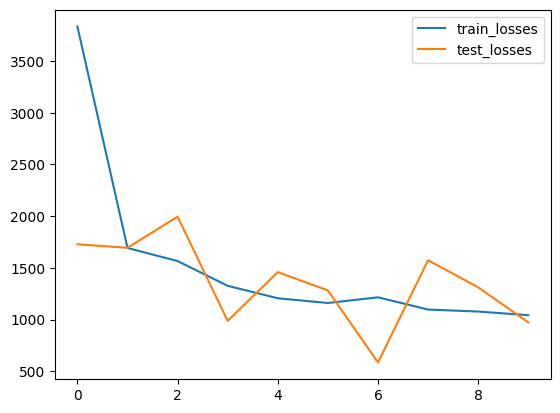

In [31]:
import matplotlib.pyplot as plt


plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

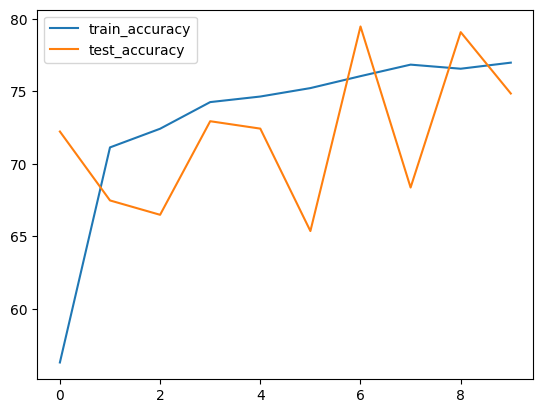

In [32]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()